In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sb

In [2]:
le = LabelEncoder()

# define helper functions
def encoder(features, columns):

    for ftr in columns:
        features[ftr] = le.fit_transform(features[ftr])

In [3]:
# read data from csv and display first 5 rows
job_dataframe = pd.read_csv("Job_Placement_Data.csv")
job_dataframe.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
# general info about the datasett
job_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [5]:
# prepare data for modeling
columnsToEncode = ['specialisation', 'undergrad_degree', 'hsc_subject', 'hsc_board', 'ssc_board', 'gender', 'work_experience']
encoder(job_dataframe, columnsToEncode)
features = job_dataframe.drop(columns="status")
y = job_dataframe["status"]

X_train , X_test , y_train , y_test = train_test_split(features , y , test_size=0.2, random_state=42)

Pearson Correlation graph


<AxesSubplot: >

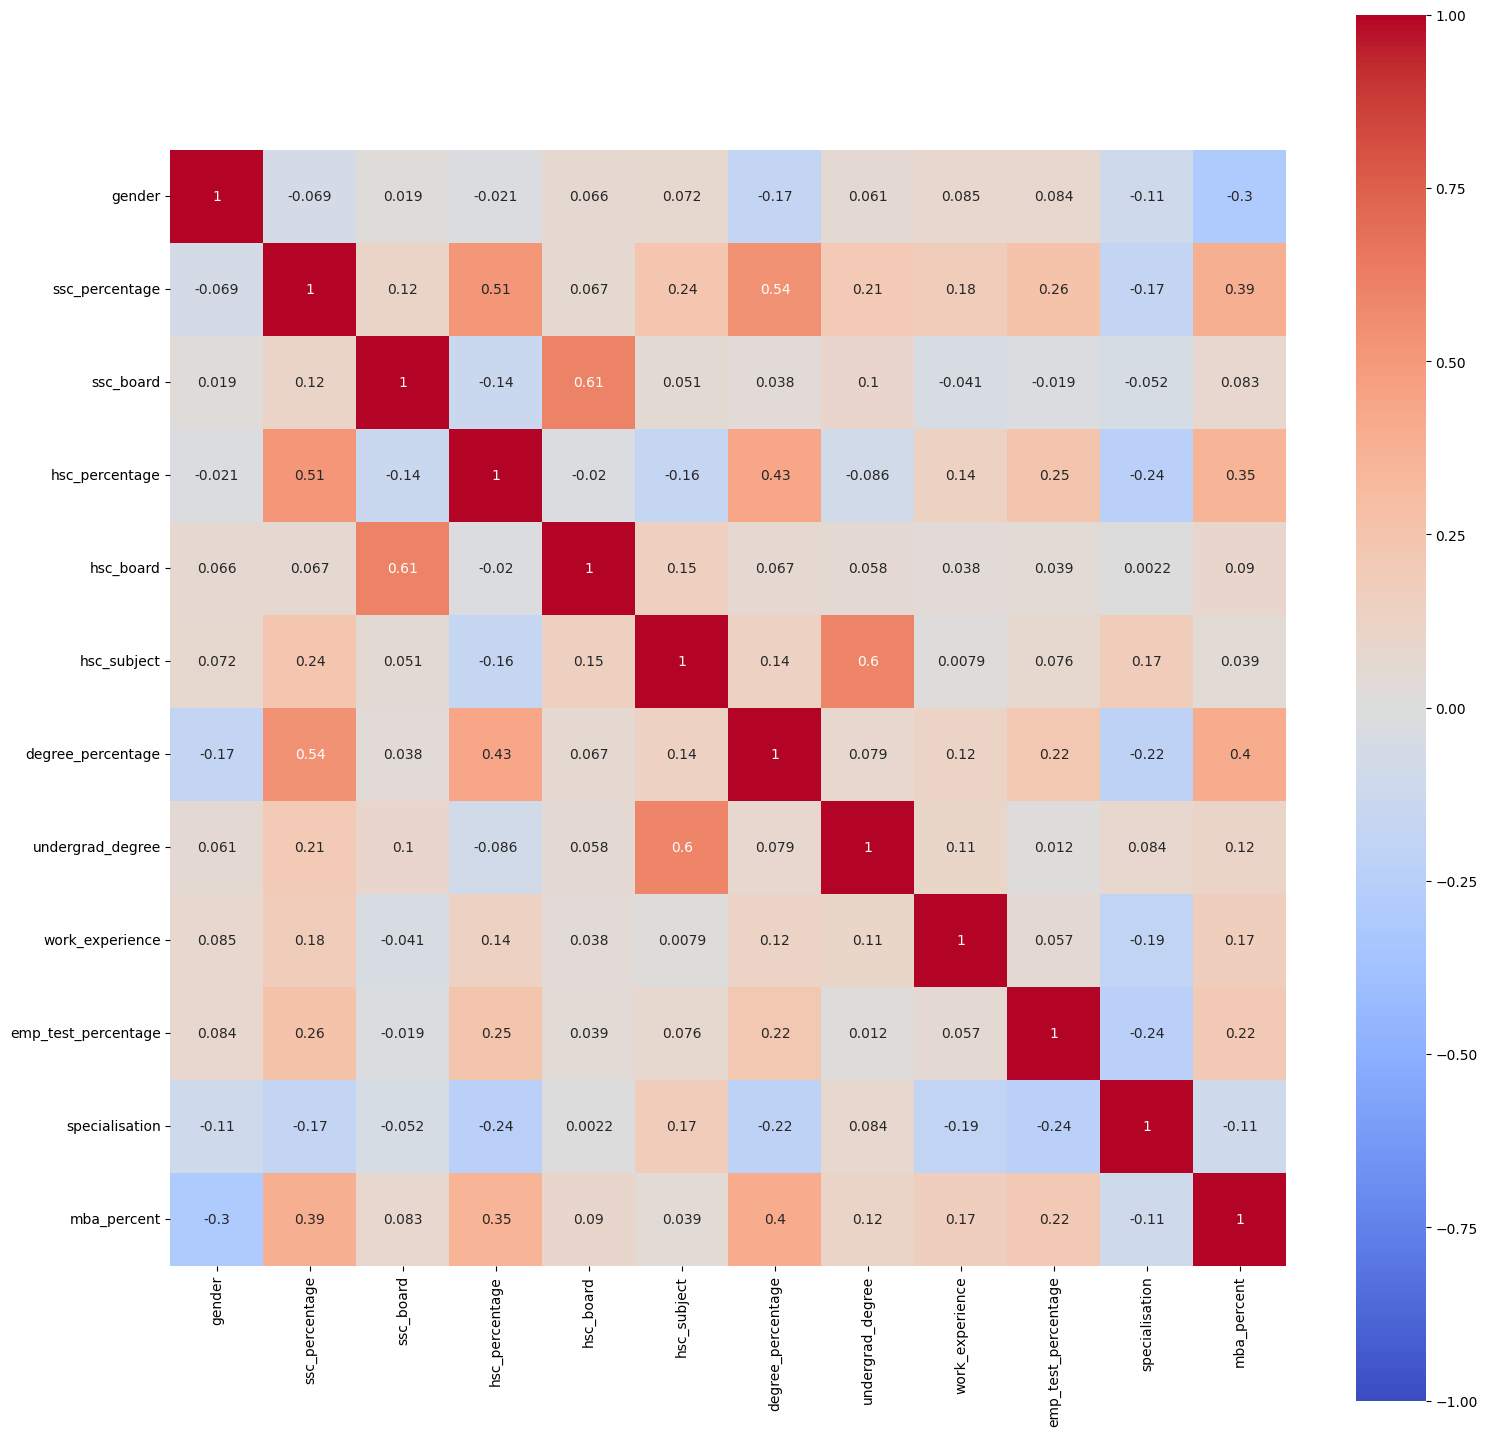

In [6]:
# pearson correlation between the dataset featrues
print("Pearson Correlation graph")
plt.figure(figsize=(18,18))
sb.heatmap(features.corr("pearson", numeric_only=False),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True,)

In [7]:
# machine learning part
model = LogisticRegression(max_iter=15000)
model.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=15000)

In [8]:
# prediction part
y_train_pred = model.predict(X_train)
y_test_pred =  model.predict(X_test)

In [9]:
# benchmarking
print("Accuracy of the model on the test dataset")
model_test_accuracy = accuracy_score(y_test, y_test_pred)
print("- Test accuracy", model_test_accuracy) 

print("Accuracy of the model on training dataset")
model_train_accuracy = accuracy_score(y_train, y_train_pred)
print("- Train accuracy:", model_train_accuracy)

Accuracy of the model on the test dataset
- Test accuracy 0.8837209302325582
Accuracy of the model on training dataset
- Train accuracy: 0.8895348837209303


prediction visualization for test


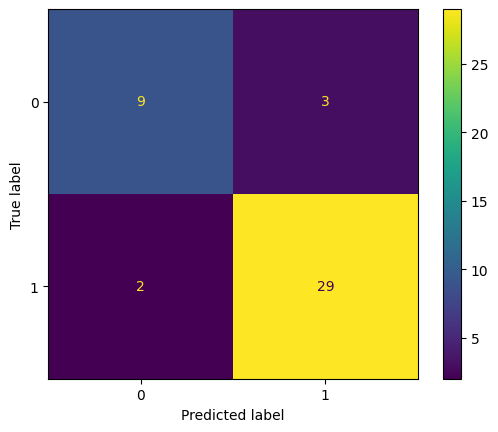

In [10]:
# prediction visulization for test 
print("prediction visualization for test")
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

prediction visualization for training model


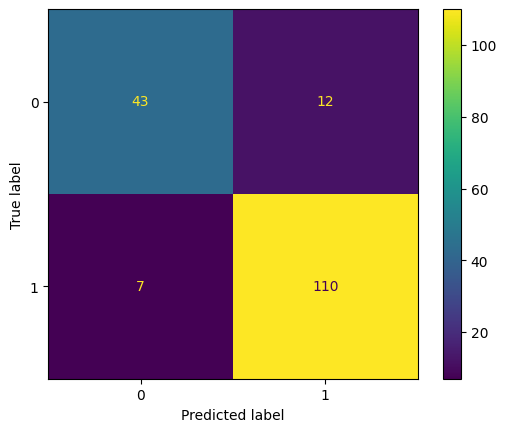

In [11]:
# prediction visulization for training model 
print("prediction visualization for training model")
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()